In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data=pd.read_csv('C:\\Users\\krishna meghana\\Downloads\\adult.csv',header=None)

In [4]:
data.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__Numerical Attributes__: Age, FnlWgt, Education-num, Capital-Gain, Capital-Loss, Hours-Per-Week.


__Categorical Attributes__: WorkClass, Education, Marital-Status, Occupation, Relationship, Race, Sex, Native-Country, Income.

- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


There appears to be a huge difference in the minimum and maximum values. The data needs to be scaled for modeling.

In [9]:
#Checking for missing values

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values. But just to be sure, looking at the value counts of a categorical variable

In [10]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Here, we have encountered an unknown character '?'

The missing values must have been imputed with this character. Replacing this character with nan values to get the exact number of missing values.

In [12]:
data[data == ' ?'] = np.nan

In [13]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

The variables - __workclass__, __occupation__ and __native_country__ contain missing values. All of these variables are of categorical data type. So, we can impute the missing values with the most frequent value of that column - the mode.

In [14]:
data["workclass"]=data["workclass"].fillna(data["workclass"].mode()[0])
data["occupation"]=data["occupation"].fillna(data["occupation"].mode()[0])
data["native_country"]=data["native_country"].fillna(data["native_country"].mode()[0])

In [15]:
#Now we again check for missing values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values now.

In [16]:
data.duplicated().sum()

24

In [17]:
print("Initial shape of the dataset : ", data.shape)

# Dropping the duplicate Rows
data = data.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", data.shape)

Initial shape of the dataset :  (32561, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


In [18]:
data1=data

In [19]:
# Reformat The Column We Are Predicting
data1['income']=data['income'].map({' <=50K': 0, ' >50K': 1})
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
data1.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

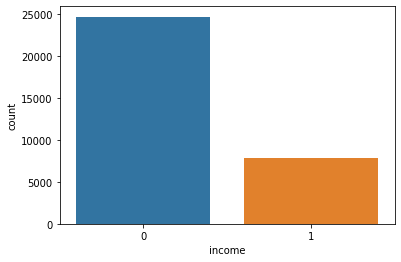

In [21]:
sns.countplot(data1['income'],label="Count")
plt.show()

- The number of people earning more than 50K dollars an year is almost one third of the people earning less than it.

The classes are imbalanced.

### Setting feature vector and target variable

As we see that the values of attributes in the dataset vary largely, so it is important to scale the data.

In [22]:
X = data1.drop(['income'], axis=1)

y = data1['income']

### Split data into separate training and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Encoding categorical variables

In [24]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [25]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
13011,36,3,316298,9,13,4,12,3,4,1,0,0,40,38
24494,30,3,101283,15,10,4,7,1,4,0,0,0,40,38
16923,41,3,143003,8,11,2,7,0,1,1,7298,0,60,18
25335,46,4,216414,12,14,2,11,0,4,1,0,1977,60,38
12363,37,1,249392,8,11,2,10,0,4,1,0,0,40,38


In [26]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SMOTE

#### Since the target feature is highly imbalanced, apply SMOTE technique to balance the dataset.

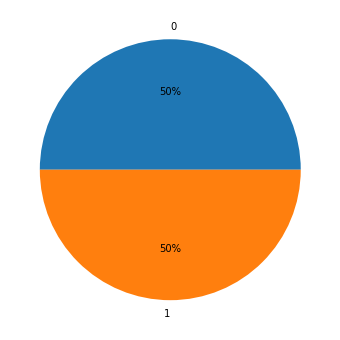

In [27]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)
num=y_train.value_counts()
plt.figure(figsize=(10,6))
plt.pie(num,labels=["0","1"],autopct='%1.0f%%')
plt.show()

In [28]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [29]:

svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [31]:
# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Accuracy with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy with default hyperparameters: 0.7996
